# Centroid-Based Clustering

Centroid-based clustering methods are popular techniques for partitioning datasets into clusters. These methods assign data points to clusters based on their proximity to the cluster centroids. The two primary centroid-based clustering methods are K-Means and K-Medoids.

## 1. K-Means Clustering

K-Means clustering aims to partition the data into K clusters such that the total within-cluster variance is minimized. It iteratively assigns data points to clusters and updates the cluster centroids.

### Mathematical Foundation

1. **Objective Function**: K-Means minimizes the following objective function:
---


>$$J = \sum_{i=1}^{K} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2$$

   where $C_i$ is the set of points in cluster $i$ and $\mu_i$ is the centroid of cluster $i$.


---
2. **Algorithm**:
   - Initialize K centroids randomly.
   - Repeat until convergence:
     - Assign each data point to the nearest centroid.
     - Update the centroids by calculating the mean of all points in each cluster.

### Implementation with Example

Let's apply K-Means clustering on a synthetic dataset representing customer segmentation based on annual income and spending score.

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Generate synthetic data for customer segmentation
np.random.seed(42)
income = np.random.randint(20, 100, 200)
spending_score = np.random.randint(1, 100, 200)
data = pd.DataFrame({'Annual_Income': income, 'Spending_Score': spending_score})

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

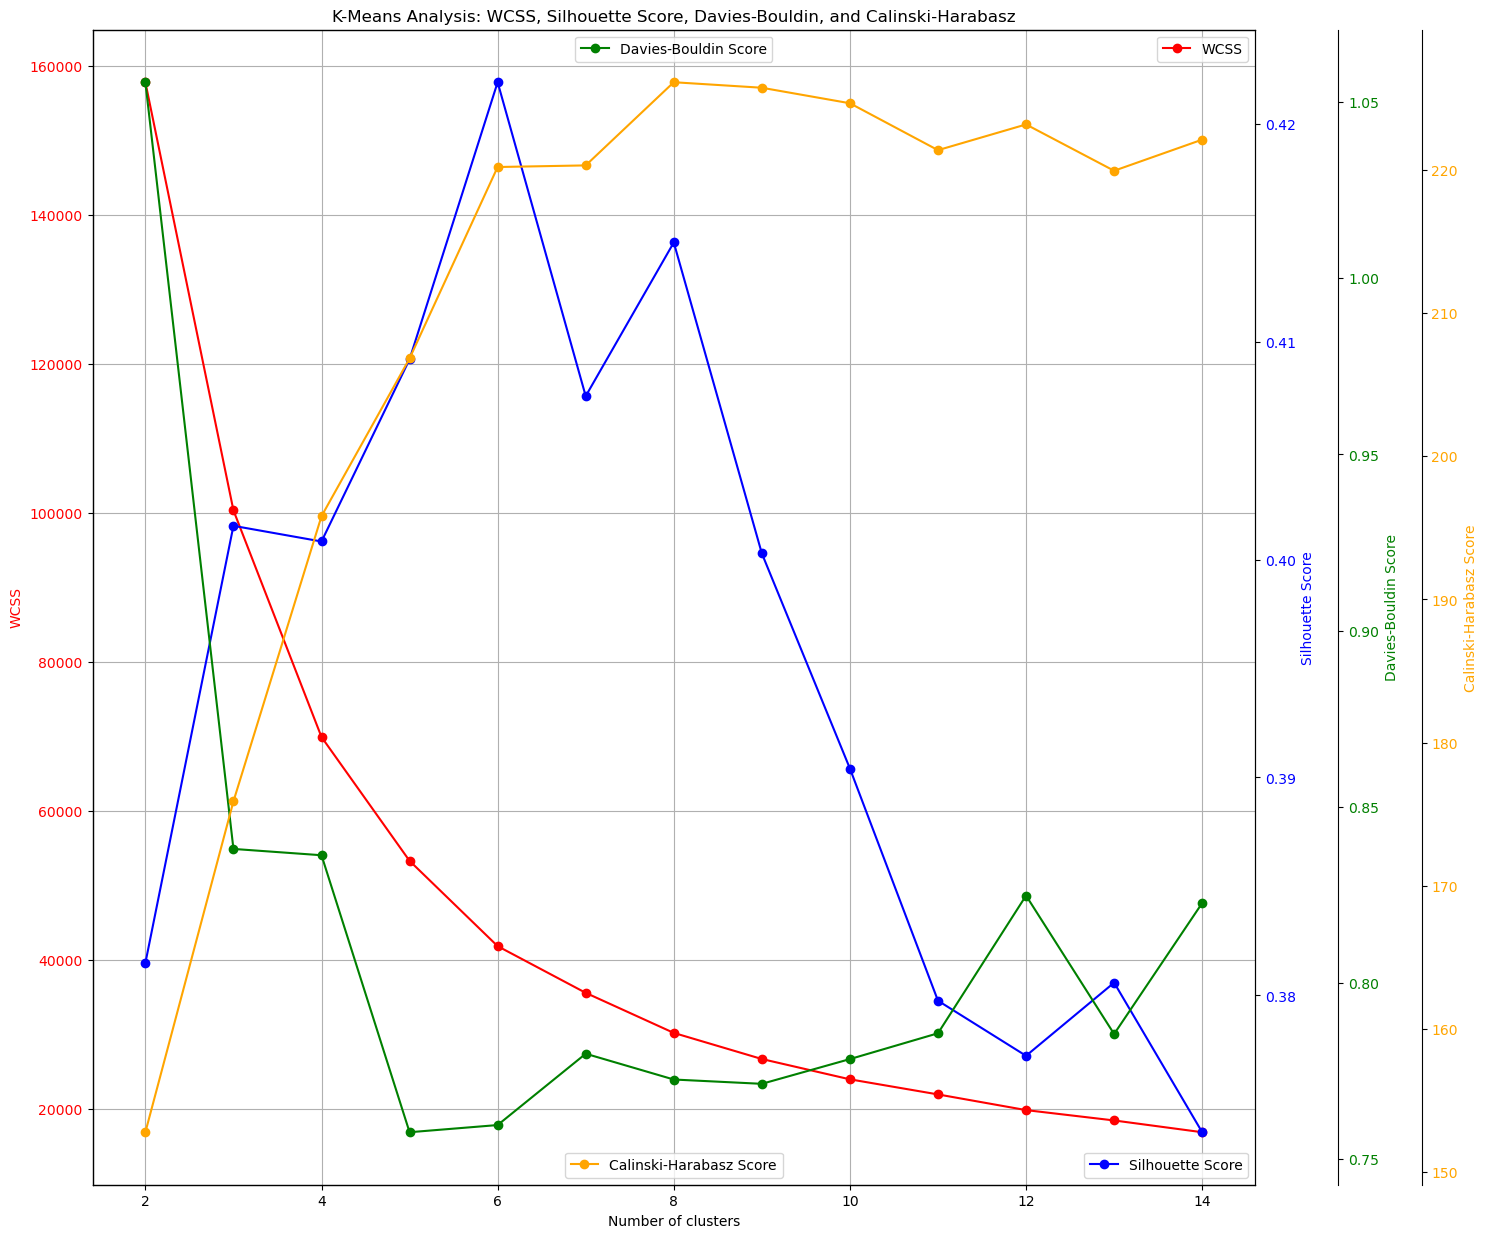

In [109]:
# Initialize lists to store results
wcss = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Range of cluster numbers to test
clusters_range = range(2, 15)

# Loop over different numbers of clusters
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(data[['Annual_Income', 'Spending_Score']])
    labels = kmeans.labels_
    
    wcss.append(kmeans.inertia_)  # WCSS
    silhouette_scores.append(silhouette_score(data[['Annual_Income', 'Spending_Score']], labels))  # Silhouette Score
    davies_bouldin_scores.append(davies_bouldin_score(data[['Annual_Income', 'Spending_Score']], labels))  # Davies-Bouldin Score
    calinski_harabasz_scores.append(calinski_harabasz_score(data[['Annual_Income', 'Spending_Score']], labels))  # Calinski-Harabasz Score

# Create the figure for the plots
fig, ax1 = plt.subplots(figsize=(15, 15))

# Plot for WCSS
ax1.plot(clusters_range, wcss, label="WCSS", color="red", marker="o")
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("WCSS", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.grid(True)

# Secondary axis for Silhouette Score
ax2 = ax1.twinx()
ax2.plot(clusters_range, silhouette_scores, label="Silhouette Score", color="blue", marker="o")
ax2.set_ylabel("Silhouette Score", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Tertiary axis for Davies-Bouldin Score
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset for tertiary axis
ax3.plot(clusters_range, davies_bouldin_scores, label="Davies-Bouldin Score", color="green", marker="o")
ax3.set_ylabel("Davies-Bouldin Score", color="green")
ax3.tick_params(axis='y', labelcolor="green")

# Quaternary axis for Calinski-Harabasz Score
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # Offset for quaternary axis
ax4.plot(clusters_range, calinski_harabasz_scores, label="Calinski-Harabasz Score", color="orange", marker="o")
ax4.set_ylabel("Calinski-Harabasz Score", color="orange")
ax4.tick_params(axis='y', labelcolor="orange")

# Legends
ax1.legend(loc="upper right")
ax2.legend(loc="lower right")
ax3.legend(loc="upper center")
ax4.legend(loc="lower center")

# Show the plot
plt.title("K-Means Analysis: WCSS, Silhouette Score, Davies-Bouldin, and Calinski-Harabasz")
plt.show()

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Generate synthetic data for customer segmentation
np.random.seed(42)
income = np.random.randint(20, 100, 200)
spending_score = np.random.randint(1, 100, 200)
data = pd.DataFrame({'Annual_Income': income, 'Spending_Score': spending_score})

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Annual_Income', 'Spending_Score']])

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


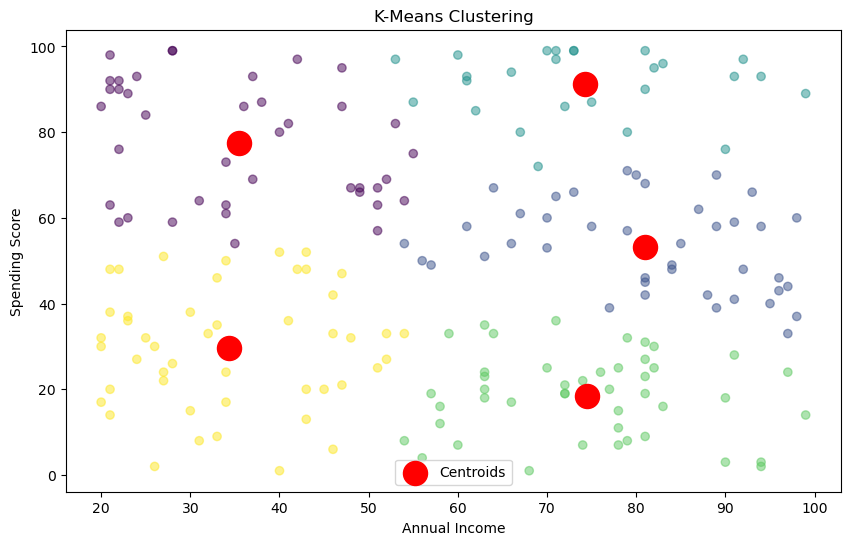

In [111]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual_Income'], data['Spending_Score'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

## Validation and Evaluation

Validation and evaluation of clustering results are crucial to understand the quality and effectiveness of the clustering algorithm. Here are the common methods used for validating and evaluating clustering results:

1. **Silhouette Score**: The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates better clustering. The formula for the silhouette score is:
---


>$$\text{s(i)} = \frac{b(i)-a(i)}{\max{(a(i),b(i))}}$$

Where:
- $a(i)$ is the average intra-cluster distance, distance between a sample and all other points in the same cluster.
- $b(i)$ is the average nearest-cluster distance, distance between a sample and all points in the next nearest cluster.


---
2. **Within-Cluster Sum of Squares (WCSS)**: This metric measures the sum of squared distances between each point and the centroid of its assigned cluster. It is used in K-Means clustering to evaluate the compactness of the clusters.
---


>$$\text{WCSS} = \sum_{k=1}^{K} \sum_{i \in C_k} \| \mathbf{x}_i - \boldsymbol{\mu}_k \|^2$$

Where:
- $K$ is the number of clusters
- $C_k$ is the k-th cluster
- $\mathbf{x}_i$ is a data point in the k-th cluster
- $\boldsymbol{\mu}_k$ is the centroid of the k-th cluster


---

3. **Davies-Bouldin Index**: This index measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.
---


>$$\text{DB} = \frac{1}{K} \sum_{k=1}^{K} \max_{j \ne k} \left( \frac{\sigma_k + \sigma_j}{d(\boldsymbol{\mu}_k, \boldsymbol{\mu}_j)} \right)$$

Where:
- $K$ is the number of clusters
- $\sigma_k$ is the average distance between each point in cluster $k$ and the centroid $\boldsymbol{\mu}_k$
- $d(\boldsymbol{\mu}_k, \boldsymbol{\mu}_j)$ is the distance between the centroids of clusters $k$ and $j$


---

4. **Calinski-Harabasz Index**: Also known as the Variance Ratio Criterion, this index measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher values indicate better clustering.
---


>$$\text{CH} = \frac{\text{Tr}(B_k) / (K - 1)}{\text{Tr}(W_k) / (N - K)}$$

Where:
- $\text{Tr}(B_k)$ is the trace of the between-group dispersion matrix
- $\text{Tr}(W_k)$ is the trace of the within-group dispersion matrix
- $K$ is the number of clusters
- $N$ is the total number of data points


---

These metrics provide different perspectives on the quality of the clustering results and help in selecting the appropriate number of clusters and evaluating the clustering algorithm's performance.

In [112]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(data[['Annual_Income', 'Spending_Score']], data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.40918969644169595


In [113]:
# Calculate Within-Cluster Sum of Squares (WCSS)
wcss = kmeans.inertia_
print(f'WCSS: {wcss}')

WCSS: 53342.22474930507


In [114]:
# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data[['Annual_Income', 'Spending_Score']], data['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin}')

Davies-Bouldin Index: 0.7576171048353139


In [115]:
# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data[['Annual_Income', 'Spending_Score']], data['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

Calinski-Harabasz Index: 206.82257117266383


# 2. K-Medoids Clustering
K-Medoids clustering, also known as Partitioning Around Medoids (PAM), is similar to K-Means but instead of using centroids, it uses actual data points (medoids) as cluster centers. This makes K-Medoids more robust to noise and outliers.

### Mathematical Foundation

1. **Objective Function**: K-Medoids minimizes the sum of dissimilarities between data points and their nearest medoid:
---


>$$J = \sum_{i=1}^{K} \sum_{x_j \in C_i} \| x_j - m_i \|$$

Where:
- $C_i$ is the set of points in cluster $i$ and $m_i$ is the medoid of cluster $i$.


---
2. **Algorithm**

- Initialize $K$ medoids randomly.
- Repeat until convergence:
   - Assign each data point to the nearest medoid.
   - Update the medoids by selecting the data point within each cluster that minimizes the total distance to other points in the cluster.

### Implementation with Example

Let's apply K-Medoids clustering on the same synthetic dataset.


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Generate synthetic data for customer segmentation
np.random.seed(42)
income = np.random.randint(20, 100, 200)
spending_score = np.random.randint(1, 100, 200)
data = pd.DataFrame({'Annual_Income': income, 'Spending_Score': spending_score})

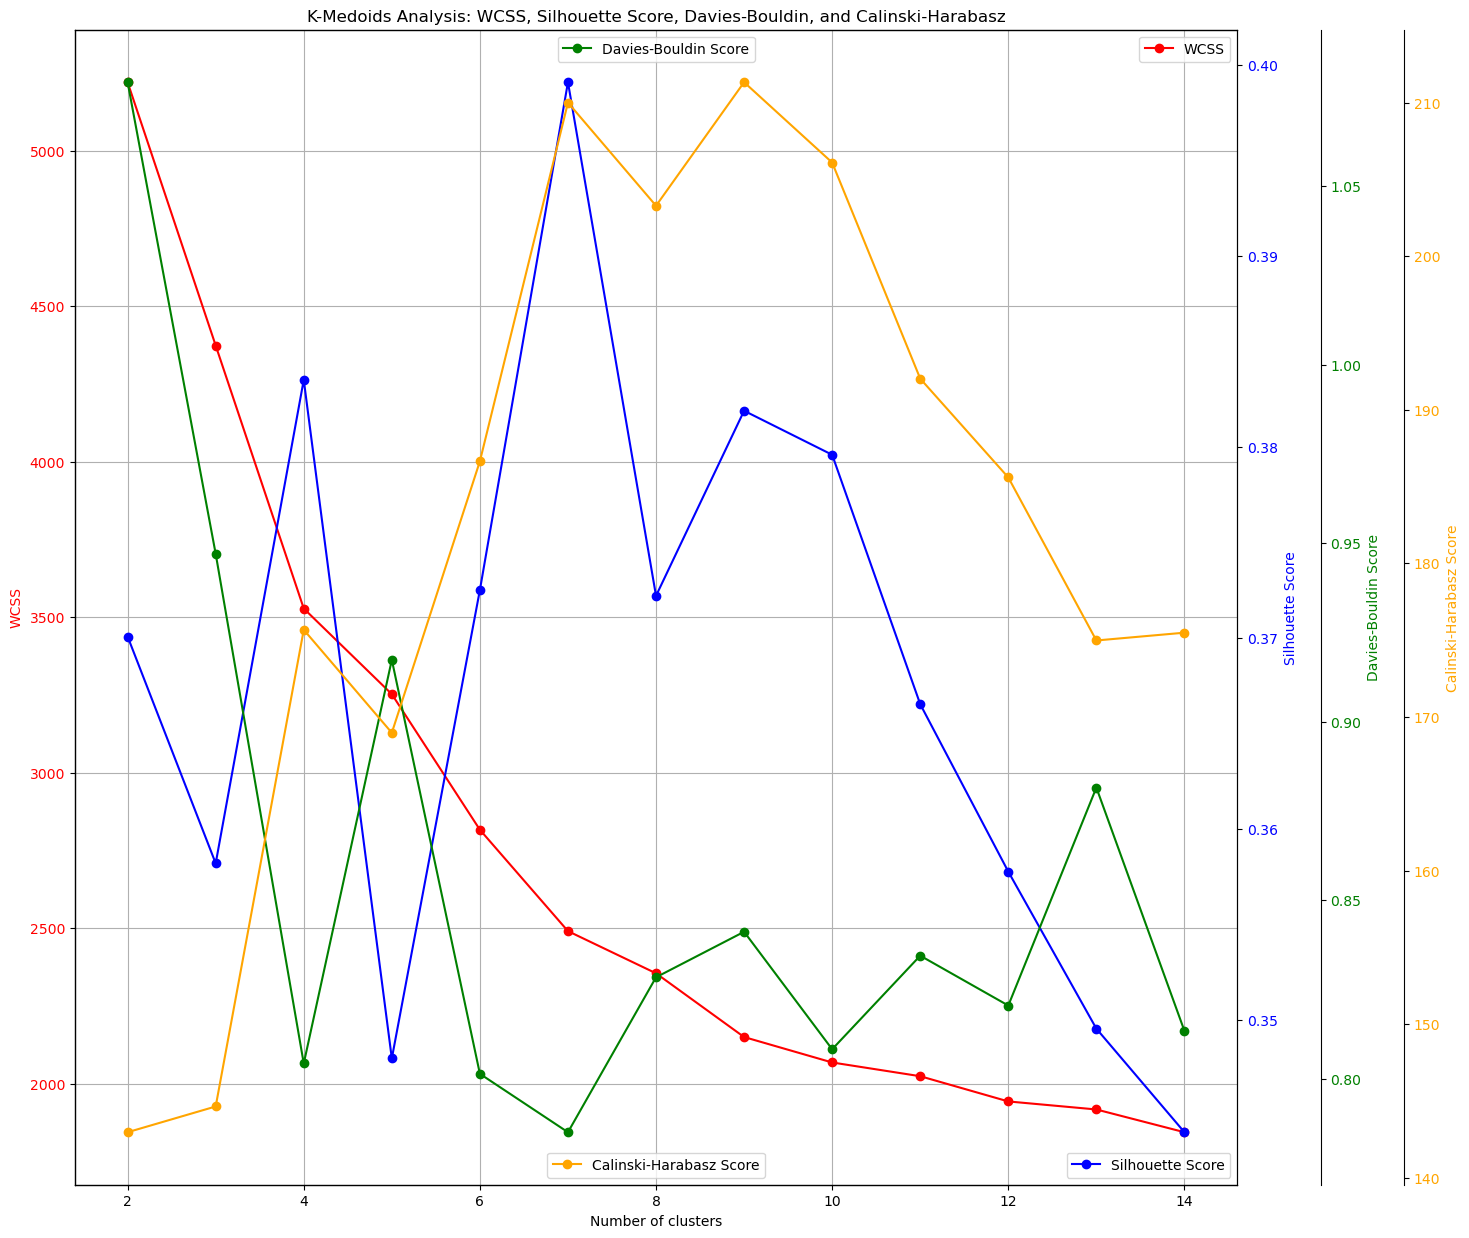

In [117]:
# Finding optimal number of clusters for K-Medoids
wcss_medoids = []
silhouette_scores_medoids = []
davies_bouldin_indices_medoids = []
calinski_harabasz_scores_medoids = []

range_n_clusters = range(2, 15)

for n_clusters in range_n_clusters:
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    cluster_labels_medoids = kmedoids.fit_predict(data[['Annual_Income', 'Spending_Score']])
    wcss_medoids.append(kmedoids.inertia_)
    silhouette_scores_medoids.append(silhouette_score(data[['Annual_Income', 'Spending_Score']], cluster_labels_medoids))
    davies_bouldin_indices_medoids.append(davies_bouldin_score(data[['Annual_Income', 'Spending_Score']], cluster_labels_medoids))
    calinski_harabasz_scores_medoids.append(calinski_harabasz_score(data[['Annual_Income', 'Spending_Score']], cluster_labels_medoids))

# Create the figure for the plots
fig, ax1 = plt.subplots(figsize=(15, 15))

# Plot for WCSS
ax1.plot(range_n_clusters, wcss_medoids, label="WCSS", color="red", marker="o")
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("WCSS", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.grid(True)

# Secondary axis for Silhouette Score
ax2 = ax1.twinx()
ax2.plot(range_n_clusters, silhouette_scores_medoids, label="Silhouette Score", color="blue", marker="o")
ax2.set_ylabel("Silhouette Score", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Tertiary axis for Davies-Bouldin Score
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset for tertiary axis
ax3.plot(range_n_clusters, davies_bouldin_indices_medoids, label="Davies-Bouldin Score", color="green", marker="o")
ax3.set_ylabel("Davies-Bouldin Score", color="green")
ax3.tick_params(axis='y', labelcolor="green")

# Quaternary axis for Calinski-Harabasz Score
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # Offset for quaternary axis
ax4.plot(range_n_clusters, calinski_harabasz_scores_medoids, label="Calinski-Harabasz Score", color="orange", marker="o")
ax4.set_ylabel("Calinski-Harabasz Score", color="orange")
ax4.tick_params(axis='y', labelcolor="orange")

# Legends
ax1.legend(loc="upper right")
ax2.legend(loc="lower right")
ax3.legend(loc="upper center")
ax4.legend(loc="lower center")

# Show the plot
plt.title("K-Medoids Analysis: WCSS, Silhouette Score, Davies-Bouldin, and Calinski-Harabasz")
plt.show()

In [118]:
# Apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=5, random_state=42)
data['Cluster'] = kmedoids.fit_predict(data[['Annual_Income', 'Spending_Score']])

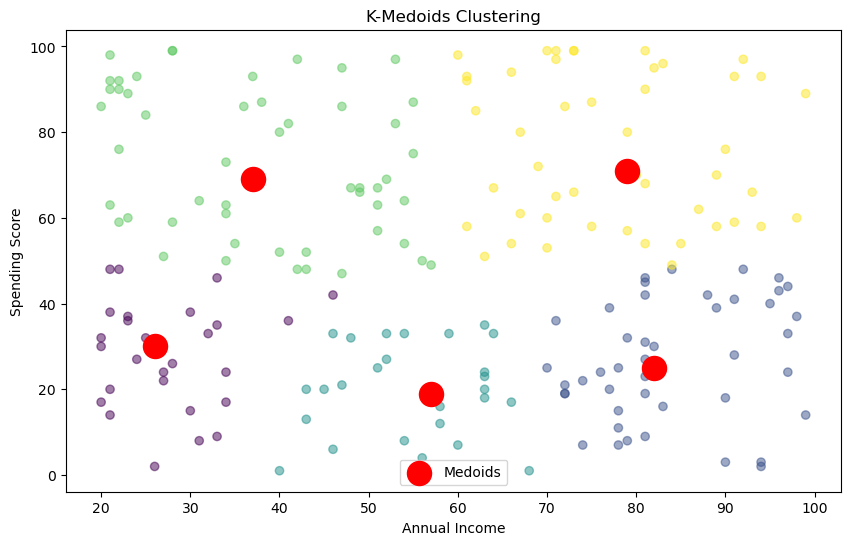

In [119]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual_Income'], data['Spending_Score'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(data.iloc[kmedoids.medoid_indices_, 0], data.iloc[kmedoids.medoid_indices_, 1], s=300, c='red', label='Medoids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()

In [120]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(data[['Annual_Income', 'Spending_Score']], data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3479647857870228


In [121]:
# Calculate Within-Cluster Sum of Squares (WCSS)
wcss = kmedoids.inertia_
print(f'WCSS: {wcss}')

WCSS: 3253.087553299386


In [122]:
# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data[['Annual_Income', 'Spending_Score']], data['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin}')

Davies-Bouldin Index: 0.9173100218716612


In [123]:
# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data[['Annual_Income', 'Spending_Score']], data['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

Calinski-Harabasz Index: 168.97142882666802


## Finding the Optimal Number of Clusters

Determining the optimal number of clusters, $k$, is a crucial step in clustering analysis. There are several methods to find the optimal number of clusters, including the Elbow Method, the Silhouette Method, and the Davies-Bouldin Index. Here, we will demonstrate how to use these methods with synthetic data.

### Elbow Method
The Elbow Method involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. The point at which the WCSS starts to decrease slowly (forming an "elbow") is considered the optimal number of clusters.

### Silhouette Method
The Silhouette Method involves calculating the Silhouette Score for different numbers of clusters. The number of clusters with the highest average Silhouette Score is considered the optimal number of clusters.

### Davies-Bouldin Index
The Davies-Bouldin Index measures the average similarity ratio of each cluster with the cluster that is most similar to it. Lower values indicate better clustering. The number of clusters that minimizes the Davies-Bouldin Index is considered optimal.

# 3. Centroid-Based Clustering Constraints

K-Means clustering has some constraints and considerations:

- **Variables**: K-Means does not handle categorical variables directly. They need to be transformed into numerical form using techniques such as one-hot encoding (pandas.get_dummies) or factor transformation.
- **Missing Values** : Handle missing values by either imputing them or removing the records with missing values.
- **Normalization**: Standardize the data to reduce disparity between variables and ensure they contribute equally to the distance calculations.

## Strengths and Weaknesses of K-Means

**Strengths**:

- Easy to implement.
- Scalable to large datasets.
- Efficient for spherical clusters.

**Weaknesses**:

- Requires predefining the number of clusters, $K$
- Sensitive to the initial placement of centroids.
- Only works with numerical data.

## Cluster Homogeneity

Cluster homogeneity can be evaluated by measuring the mean distance of points in a cluster to the cluster centroid. A small mean distance indicates a homogeneous cluster.

By integrating these considerations, strengths, and weaknesses, you can better understand how to apply centroid-based clustering methods like K-Means and K-Medoids to your datasets.

## Comparison between K-Means and K-Medoids

K-Means and K-Medoids are two centroid-based clustering methods that differ in how they define cluster centers and their sensitivity to outliers.

### K-Means
- **Cluster Center**: Uses the mean of points in a cluster as the centroid.
- **Sensitivity to Outliers**: Sensitive to outliers as they can significantly affect the mean.
- **Computational Complexity**: Generally faster as calculating means is simpler.
- **Type of Data**: Best suited for continuous data.

### K-Medoids
- **Cluster Center**: Uses an actual data point as the medoid.
- **Sensitivity to Outliers**: Less sensitive to outliers because medoids are actual data points.
- **Computational Complexity**: Slower because it requires calculating distances between all points to find the medoid.
- **Type of Data**: Can handle mixed and categorical data more easily.

### Applications
- **K-Means**: Commonly used for image processing, customer segmentation, and other applications where data is continuous and large.
- **K-Medoids**: Preferred in applications where robustness to outliers is crucial, such as in biology for DNA sequence classification or in medicine for symptom clustering.


## Cluster Evaluation

Evaluating clusters helps measure the quality and homogeneity of clusters formed by a clustering algorithm. Here are some commonly used methods:

### Dunn Index
The Dunn Index is used to identify compact and well-separated clusters. A high Dunn Index indicates well-formed clusters.

The Dunn Index $D$ is defined as:

---


>$$D = \frac{\min_{1 \leq i < j \leq k} \delta(C_i, C_j)}{\max_{1 \leq l \leq k} \Delta(C_l)}$$

Where:
- $\delta(C_i, C_j)$ is the inter-cluster distance between clusters $C_i$ and $C_j$
- $\Delta(C_l)$ is the intra-cluster distance of cluster $C_l$


---

### Adjusted Rand Index
The Adjusted Rand Index measures the similarity between two data clusterings, adjusting for the chance grouping. It is often used to compare the found clustering to a reference classification.

The Adjusted Rand Index $\text{ARI}$ is calculated as:

---


>$$ARI = \frac{RI - E[RI]}{\max(RI) - E[RI]}$$

Where:
- $RI$ is the Rand Index
- $E[RI]$ is the expected Rand Index (the value of the Rand Index expected by chance)


---

### Implementing Dunn Index and Adjusted Rand Index in Python

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Adjusted Rand Index: 0.001383835588210933
Dunn Index: 0.02548139793238575


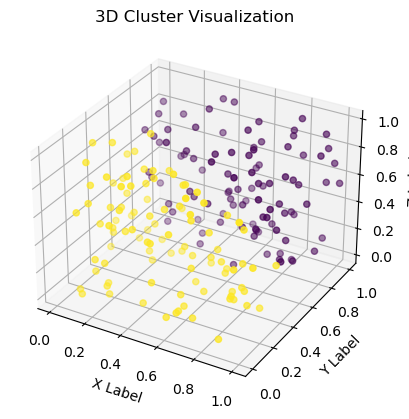

In [124]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, pairwise_distances
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
data = np.random.rand(200, 3)  # 200 points in 3-dimensional space

# True labels (for demonstration purposes, we'll assume two clusters)
true_labels = np.array([0] * 100 + [1] * 100)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
predicted_labels = kmeans.fit_predict(data)

# Function to calculate Dunn Index
def dunn_index(X, labels):
    distances = pairwise_distances(X)
    unique_cluster_labels = np.unique(labels)
    delta = np.min([np.min(distances[labels == i][:, labels == j]) 
                    for i in unique_cluster_labels for j in unique_cluster_labels if i != j])
    big_delta = np.max([np.max(distances[labels == k]) 
                        for k in unique_cluster_labels])
    return delta / big_delta

# Calculate Adjusted Rand Index and Dunn Index
adjusted_rand = adjusted_rand_score(true_labels, predicted_labels)
dunn = dunn_index(data, predicted_labels)

print(f"Adjusted Rand Index: {adjusted_rand}")
print(f"Dunn Index: {dunn}")

# 3D Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=predicted_labels, cmap='viridis')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Cluster Visualization')

plt.show()


## 3D Visualizations

3D visualizations can help better understand the structure of clusters, especially when dealing with multivariate data. Here is an example of a 3D visualization implementation using Matplotlib.


## Extensions and Variants of K-Means and K-Medoids

### Variants of K-Means

1. **K-Means++**
   - Improves centroid initialization to speed up convergence.
   - Reduces sensitivity to initial centroid placement.
   
2. **Mini-Batch K-Means**
   - Uses mini-batches of data to update centroids, speeding up the process for large datasets.
   
3. **Bisecting K-Means**
   - Uses a divisive hierarchical approach, splitting one cluster into two at each step and then choosing the best division.

### Variants of K-Medoids

1. **PAM (Partitioning Around Medoids)**
   - Original algorithm for K-Medoids, but can be slow for large datasets.

2. **CLARA (Clustering Large Applications)**
   - Uses samples of the dataset to make PAM more scalable.

3. **CLARANS (Clustering Large Applications based on Randomized Search)**
   - Combines ideas from PAM and CLARA with randomized search to improve efficiency.

### Applications of Variants

- **K-Means++**: Widely used to improve the baseline performance of K-Means, especially for large datasets.
- **Mini-Batch K-Means**: Preferred for processing data streams or very large datasets.
- **PAM, CLARA, CLARANS**: Used for clustering problems where robustness to outliers and handling mixed data types are crucial.